<a href="https://colab.research.google.com/github/CoaDiego/SIS420---IA/blob/main/Laboratorio03/LABORATORIO03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicion de programación - Regresión Logistica

En este ejercicio del Laboratorio 03 se implementara la regresion logistica con el uso del sigueinte dataset.

Binary Classification of Bank Churn Synthetic Data

https://www.kaggle.com/datasets/cybersimar08/binary-classification-of-bank-churn-synthetic-data

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Se aplico Pandas para el preprocesamiento del dataset.
import pandas as pd

## 1 Regresion Logistica

En este ejercicio, se creará un modelo de regresión logística para predecir si un cliente sabandonara (si/no) la cuenta del Banco.

El dataset cuenta con 24 columnas y 175027 filas.
Para la validacion del modelo se debe utilizar el 80% de los datos(140022) para entrenar y el 20% para probar (35005).

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [298]:
# Cargar datos
# La columna 10(Exited) contiene la etiqueta que indica si el cliente abandono o no la cuenta.
dataset = pd.read_csv('/content/drive/MyDrive/SIS420-IA/datasets/Lab03/Dataset.csv')

dataframe = dataset
#print(dataframe)

X_train = dataset.iloc[:140022].drop(columns=dataset.columns[9])  # Todas las columnas excepto la Y
y_train = dataset.iloc[:140022, 9]  # Solo la columna 9

X_test = dataset.iloc[140022:].drop(columns=dataset.columns[9])  # Todas las columnas excepto el de Y
y_test = dataset.iloc[140022:, 9]  # Solo la columna de la variable de salida "Exited"

#X = X_train
#y = y_train

print(X_train)
print(y_train)

print(X_train.shape) #Verificar numero de columnas de X_train

        Surname  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          2023        668.0  33.0     3.0       0.00            2.0   
1          2024        627.0  33.0     1.0       0.00            2.0   
2          1236        678.0  40.0    10.0       0.00            2.0   
3          1362        581.0  34.0     2.0  148882.54            1.0   
4           491        716.0  33.0     5.0       0.00            2.0   
...         ...          ...   ...     ...        ...            ...   
140017     1350        562.0  42.0     9.0       0.00            1.0   
140018     1464        711.0  38.0     0.0       0.00            1.0   
140019     2062        619.0  34.0     3.0       0.00            2.0   
140020      701        583.0  58.0     7.0  107978.40            1.0   
140021     1001        706.0  53.0     8.0       0.00            1.0   

        HasCrCard  IsActiveMember  EstimatedSalary  Surname_tfidf_0  ...  \
0               1               0        181449.97    -3.12

In [203]:
def  featureNormalize(X):
    X_norm = X_train.copy()
    mu = np.zeros(X_train.shape[1])
    sigma = np.zeros(X_train.shape[1])

    mu = np.mean(X_train, axis = 0)
    sigma = np.std(X_train, axis = 0)
    X_norm = (X_train - mu) / sigma

    return X_norm, mu, sigma

In [204]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

In [208]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [209]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [211]:
# Configurar la matriz adecuadamente, y agregar una columna de unos
m = X_train.shape[0]
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X_train.shape)

(140022, 25)


In [212]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))

    return J

In [213]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.77425105e+00 -1.44280037e-03 -6.04654652e-02  7.42228713e-01
  9.88988547e-03 -1.30677752e-01 -4.53328113e-01 -7.07636425e-02
 -4.34494371e-01  4.78169155e-02 -1.78136348e-02 -5.87213336e-04
 -1.45005912e-02 -4.75008286e-02 -1.75131799e-02 -1.67374594e-01
  3.33554691e-01 -1.27741139e-01  1.68129095e-01 -1.68129095e-01
 -2.46812653e-01 -4.02467903e-03 -2.82672878e-03 -1.85705404e-01
  1.01477271e-01]


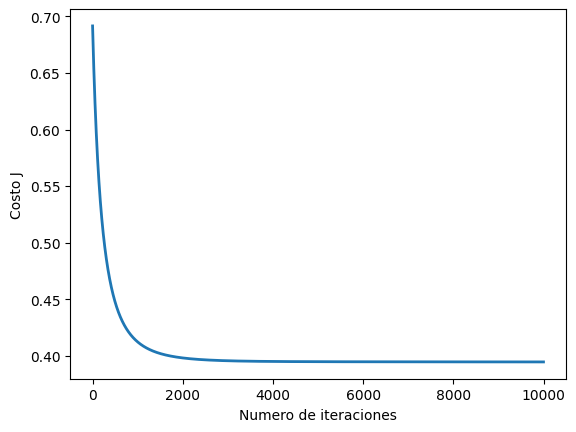

In [216]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [232]:
print(X_train.shape)
print(theta.shape)

(140022, 25)
(25,)


In [238]:
print(X_train.shape)
print(theta.shape)
#Ejemplo
X_array = np.array([1, 2023, 668, 33, 3, 0, 2, 1, 0, 181449.97, -3, -4, 1, -6, 6, 1, 0, 0,0,1,0,0,0,0,99.0])  # Aquí se incluye todas las características de ejemplo

# Calcular si abandona o no usando la función sigmoide
abandona = sigmoid(np.dot(X_array, theta))  # Cambia esto con el número correcto de características


print('Un cliente Abandona su cuenta(usando el descenso por el gradiente):{:.0f}'.format(abandona))

(140022, 25)
(25,)
Un cliente Abandona su cuenta(usando el descenso por el gradiente):1


In [299]:
print(X_test.shape)

(35006, 24)


In [300]:
m = X_test.shape[0]
print(m)

35006


In [301]:
n=X_test.shape[1]
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)
print(X_test.shape)

(35006, 25)


In [302]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_test.size  # numero de ejemplos de entrenamiento
    #Se define una pequeña cantidad epsilon para evitar problemas de logaritmo de cero en el cálculo de la función de costo
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_test.dot(theta.T))

    J = (1 / m) * np.sum(-y_test.dot(np.log(h+epsilon)) - (1 - y_test).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y_test).dot(X_test)

    return J, grad

In [303]:
print(X_test.shape)

(35006, 25)


Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [304]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Gradiente en theta inicial (zeros):')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}]'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
Costo en theta inicial (zeros): 0.693
Gradiente en theta inicial (zeros):
	[0.29, 470.24, 191.40,9.92, 1.48, 14796.27, 0.49,0.22, 0.19, 31253.38, 0.01,0.00, -0.00, 0.00, 0.00,0.18, 0.03, 0.07]


In [305]:
print(initial_theta.shape)

(25,)


In [306]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([ 527,687,40,3,9043,1,1,1,1674,6,-0.1,-0.2,0.1,-0.1,1,1,1,1,1,0.1,370,53,0.1, 0.2,120])

#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}]'.format(*grad))

[ 5.270e+02  6.870e+02  4.000e+01  3.000e+00  9.043e+03  1.000e+00
  1.000e+00  1.000e+00  1.674e+03  6.000e+00 -1.000e-01 -2.000e-01
  1.000e-01 -1.000e-01  1.000e+00  1.000e+00  1.000e+00  1.000e+00
  1.000e+00  1.000e-01  3.700e+02  5.300e+01  1.000e-01  2.000e-01
  1.200e+02]
Costo en theta prueba: 14.565
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.79, 1264.88, 518.77,29.09, 3.98, 45714.61, 1.26,0.59, 0.44, 85654.45, 0.02,0.01, -0.01, 0.01, 0.00,0.46, 0.14, 0.19, 0.32, 0.47, 0.70, 1294.25,1.91, 0.11, 146.30]


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [317]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_test, y_test),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}]'.format(*theta))

<ipython-input-317-daa0778ee3ad>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.410
theta:
	[-1.010, -0.000, -0.001,0.071, 0.182, -0.000,-0.638, -0.099, -1.286,0.000, -0.197, -0.006,-0.023, -0.241, -0.243,-0.785, 0.187, -0.780,-0.048, -0.617, 0.042,-0.000, 0.015, -6.542,-0.001]


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [318]:
def predict(theta, X):

    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [326]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([527,687,40,3,9043,1,1,1,1674,6,-0.1,-0.2,0.1,-0.1,1,1,1,1,1,0.1,370,53,0.1, 0.2,120], theta))
print('Con estos datos la prediccion es: {:.0f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X_test)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test) * 100))

Con estos datos la prediccion es: 0
Precisión de entrenamiento: 82.59 %


<ipython-input-208-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
